# Application of the noiseplanet  for GTFS Map matching

The minimum requirements of the track to be reslved should be at least 30 points

In [1]:
from noiseplanet.matcher import matching
import geopandas
import pandas
import osmnx

# Map Match using match_from_geojson

In [3]:
# Read in Geojson

In [4]:
#data = geopandas.read_file('track.geojson')

In [5]:
#data.plot(figsize=(30,10))

In [6]:
#matching.match_from_geojson('track.geojson', out_dirname='.', method='hmm', log=True)

# Map Match using match 

Match a (Lat, Lon) track on the Open Street Map road network.

noiseplanet.matcher.matching.match(graph, track, method='hmm')

Parameters:
- graph (NetworkX MultiDiGraph) – The OSM graph to match the track.
- track (numpy 2D array) – A 2D matrix composed by Latitudes (first column) and Longitudes (second column) of the track.
- method (String, optional) – Method used to match the track on the map. ‘nearest’ match the track on the nearest road. ‘hmm’ is a Hidden Markov Model based map matching algorithm. The default is ‘hmm’.

Returns:

- track_corr (numpy 2D array) – A 2D matrix composed by Latitudes (first column) and Longitudes (second column) of the track.
- route_corr (numpy 2D array) – A 2D matrix composed by Latitudes (first column) and Longitudes (second column) of the path connecting all track’s points.
- edgeid (numpy 2D array) – List of edges to which each points belongs to. Edges id are composed by two extremity nodes id.
- stats (Dict) – Statistics of the Map Matching. ‘proj_length’ is the length of the projection (from track’s point to corrected ones), ‘path_length’ is the distance on the graph between two following points, ‘unlinked’ higlights unconnected points on the graph.


# Create 2D Array for Track

In [7]:
# create 2D numpy array composed by Latitudes(first column) and Longitudes(second column) of the track

We have three different tracks from the mapping in a city in Tanzania called Dodoma. The tracks were created from mobile application tracking public transport vehicles. The tracks are in kml format. The objective is to extract the latitude and longitude from the KML file. Once we have the lat and lon we can create a 2D numpy array for input into the matching module

In [3]:
track = pandas.read_csv(r'kml_csv/route72.csv')

track = track[['ycoord','xcoord']]
track.head()

,ycoord,xcoord
0,-6.204972,35.678621
1,-6.204972,35.678621
2,-6.204972,35.678621
3,-6.204972,35.678621
4,-6.204972,35.678621


In [4]:
track.shape

(4725, 2)

In [5]:
track = track.rename(columns={'xcoord':'long','ycoord':'lat'})

In [6]:
track = track.drop_duplicates()

In [7]:
track_array = track.to_numpy()

In [8]:
len(track_array)

233

In [9]:
track_array

array([[-6.204972  , 35.678621  ],
       [-6.20415098, 35.67758392],
       [-6.20393798, 35.67765392],
       [-6.20367198, 35.67764792],
       [-6.20346498, 35.67764792],
       [-6.20325298, 35.67757392],
       [-6.20308298, 35.67755592],
       [-6.20154998, 35.67764592],
       [-6.20099498, 35.67755692],
       [-6.20078298, 35.67752392],
       [-6.20064098, 35.67748892],
       [-6.20049698, 35.67742692],
       [-6.20025198, 35.67733792],
       [-6.20002698, 35.67721592],
       [-6.19990098, 35.67710492],
       [-6.19980598, 35.67697792],
       [-6.19967998, 35.67674292],
       [-6.19958898, 35.67657292],
       [-6.19952398, 35.67642992],
       [-6.19945298, 35.67632092],
       [-6.19911298, 35.67609592],
       [-6.19890698, 35.67597992],
       [-6.19883298, 35.67624092],
       [-6.19877298, 35.67647392],
       [-6.19870798, 35.67672592],
       [-6.19867698, 35.67692292],
       [-6.19867198, 35.67728992],
       [-6.19865798, 35.67771992],
       [-6.19860898,

# Create Graph (NetworkX MultiDiGraph) - Open Streets Map

## Dodoma - Map

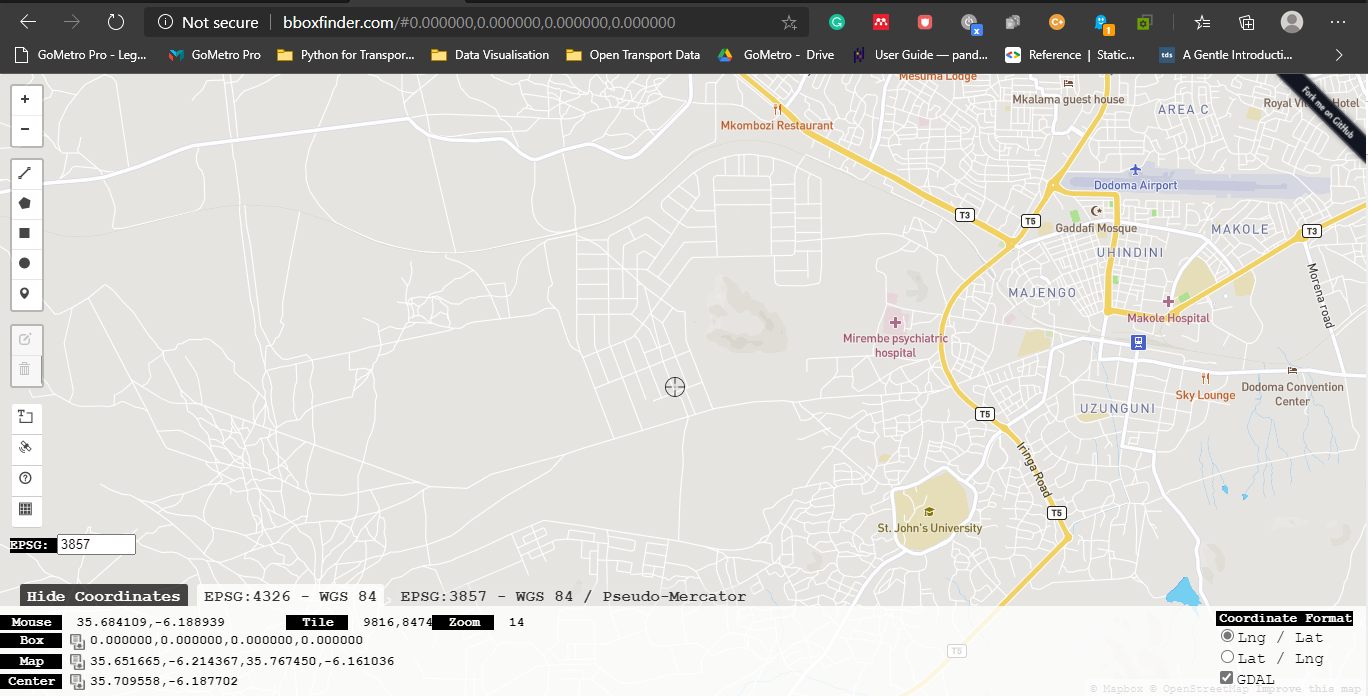

In [15]:
from IPython.display import Image
Image(filename='images/bbox-dodoma.png',height=5,width=1000)

## Dodoma - Graph

In [16]:
#graph = matching.model.graph_from_track(track_array)

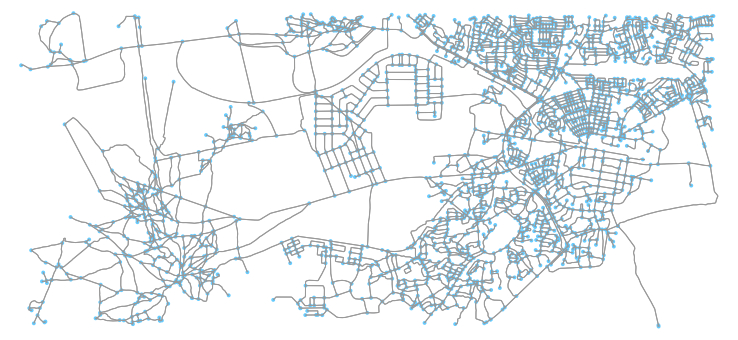

(<Figure size 934.875x432 with 1 Axes>, <AxesSubplot:>)

In [10]:

#using the Map output above to assign bounding box
# [x1, y1,x2,y2]

# north = y2
# south =y1

# east = x2
# west = x1

north =  -6.161036 #latitude 2
south = -6.21437 #latitude 1

east = 35.767450 # longitude 2
west = 35.651665 # longitude 1

G = osmnx.graph_from_bbox(north, south,east, west,network_type='drive')
G_projected = osmnx.project_graph(G)
osmnx.plot_graph(G_projected)

In [18]:
# save graph as a shapefile
osmnx.save_graph_shapefile(G, 'output/dodoma.shp')

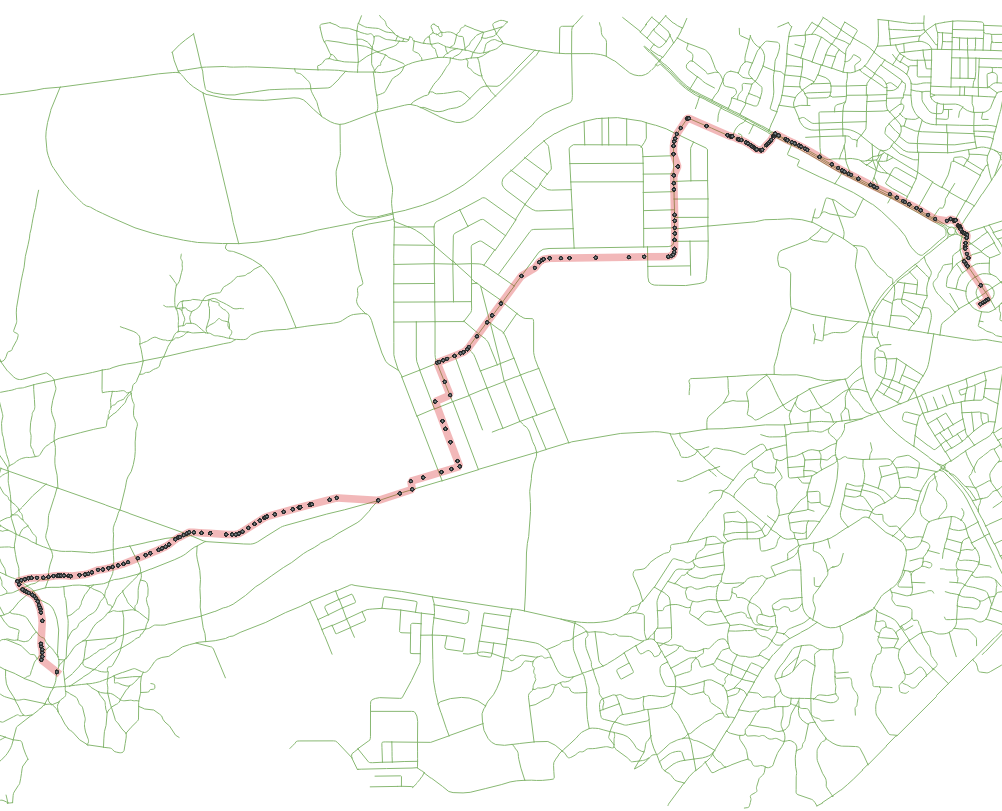

In [19]:
from IPython.display import Image
Image(filename='images/route7dodoma.png',height=5,width=600)

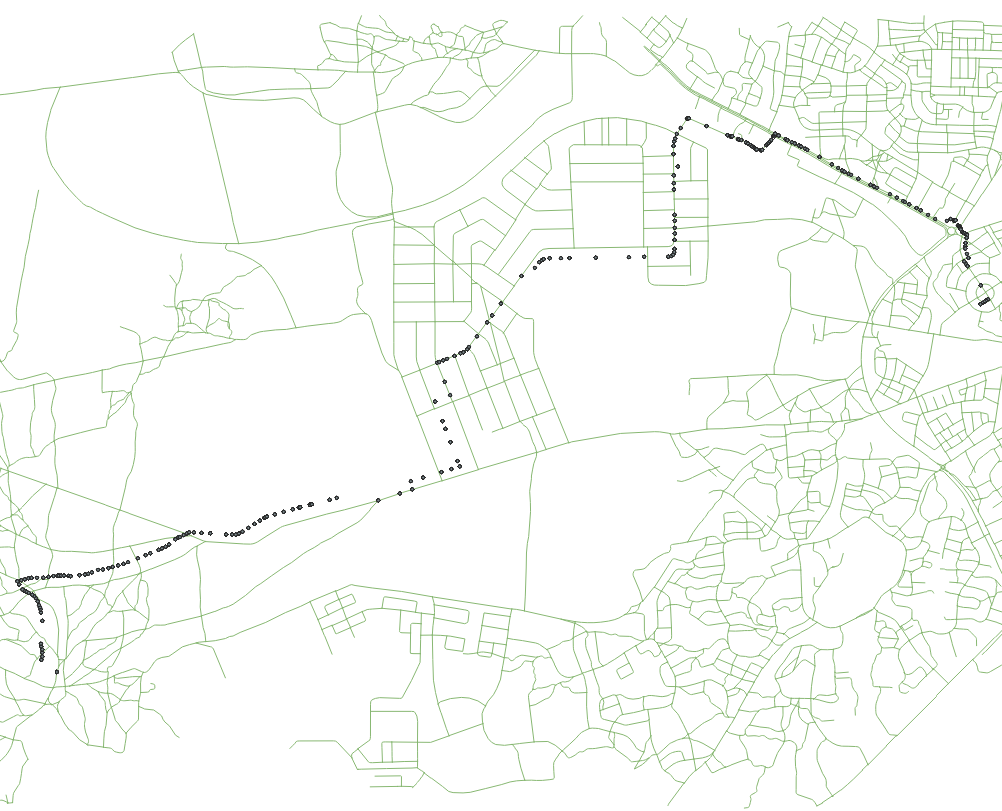

In [20]:
from IPython.display import Image
Image(filename='images/route7dodoma1.png',height=5,width=600)

In [1]:
# as a result of the memory issue we need to devise a solution that will help us avert this

In [ ]:
#match track to graph network
track_coor, route_corr, edgeid, stats = matching.match(G, track_array,method='nearest')

In [22]:
#edgeid

In [23]:
# a 2D array with Lat Lon of the track

In [25]:
track_coor

In [ ]:
df = pandas.DataFrame()
df['lat_track'],df['lon_track'] = track_coor.T
df.head()

In [ ]:
stats

In [ ]:
route_corr

In [ ]:
#df = pandas.DataFrame()
df['lat_route'],df['lon_route'] = route_corr.T
df.head()

In [ ]:
from noiseplanet.ui.foroute import plot_html

# Plot the graph
plot_html(track, track_corr=track_coor, route_corr=route_corr,proj=True, show_graph=True)